# init

In [2]:
import sys 
sys.path.append('pyfiles/')
import classes_loop as cl
# so we don't have to reboot kernel every time we modify classes.py
%load_ext autoreload
%autoreload 2

# math stuff
import numpy as np
import math
# visualization
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import distance
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline
# sliders
from ipywidgets import interactive

# for matrix import and display
import pandas as pd
from IPython.display import display_html 
import csv 

# to time things
import time
# for removing punctuation from str
import string

# for polygon grid
from matplotlib.path import Path as mplPath

######## NOTE: from this point on, order is important. 
# it would be good to make the code more robust, but right
# now, there are ordered dependencies between functions.

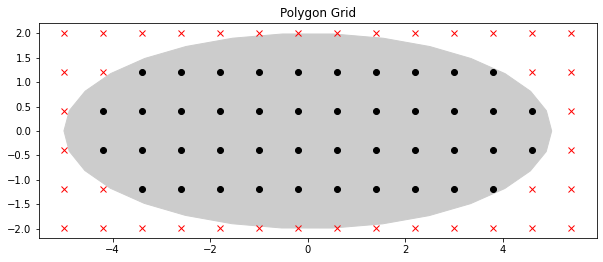

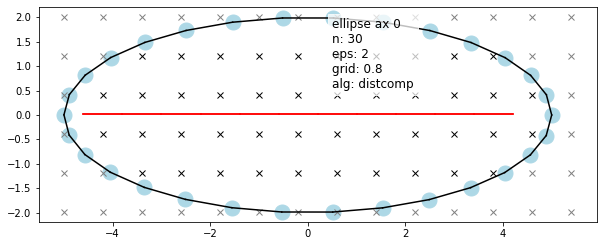

In [72]:
############################
# CONTROL PARAMETERS # 
############################

name = 'ellipse'
n = 30
# NOTE: eps has different meaning for use_distknee and not
# higher is more pruned in both
e = 2
# 0.8 is default
g = 0.8
# these shift the grid over
x_shift = 0
y_shift = 0
pts = cl.ellipse_example(n, display = False)

medaxdim = 0
# true means we use comparison of distance and eps is multiplier
# false means we use eps-nearest neighbor
use_dist = True

gridon = True
makevor = False

#############################
# ISSUE: distance in use_dist is euclidean, not geodesic
# lower left corner
textboxcoords = [.5, .55]

filename = cl.generate_filename(n, e, g, x_shift, y_shift, name, medaxdim, use_dist)
# testpoint tests a manually entered grid point and 
# spits out the info about it for debugging, but only if testpoint is True
# make medial axis
cl.make_medial_axis(numpts = n, epsilon = e, grid_density = g, 
                    inputpts = pts, design = name, axis = medaxdim, drawgrid = gridon,
                    savefig = True, figsavename = filename + '.png',
                    x_bump = x_shift, y_bump = y_shift, plotpoints = False, 
                    textboxcoords = textboxcoords, textboxon = True,
                    testpointinfo = (2, -0.5), testpoint = False,
                    use_distknee = use_dist)
# NOTE: newest addition, usedistknee, still needs to be tested to make sure it's right
# use with caution
# make voronoi
if makevor:
    vor = Voronoi(pts)
    fig, ax = plt.subplots()
    # plot voronoi stuff
    ax.set_aspect('equal')
    fig2 = voronoi_plot_2d(vor, ax, show_vertices=True, 
                    line_alpha = 1, show_points = True, 
                    point_colors='orange', point_size=10);
    plt.savefig('../shapes_medax/' + filename +'v.png', dpi = 300)

In [ ]:
p1 = np.array([0,2.0])
p2 = np.array([0,4])
distt = math.dist(p1, p2)
distt

def is_dist_knee(self, int_one, int_two, point1, point2, eps = 1, printout = False):
    
def kneebetween(point1, point2, inputpts, kneedim, vin, n = 20, i = 0, 
  j = 1, eps = 1, plot = False, printout = False, use_distknee = True):
    
l 1528

# note: check that edges generated correctly

In [ ]:
# bezier curves pass through first and last control points, but not nec. others

density = 15
# Define the control points
P0 = (0, 0)
P1 = (3, 5)
P2 = (7, -3)
P3 = (0,0)
points = [P0, P1, P2, P3]

# Generate the parameter values
t = np.linspace(0, 1, num = density)

# Compute the points on the curve
Bx = (1-t)**3 * P0[0] + 3*(1-t)**2 * t * P1[0] + 3*(1-t)*t**2 * P2[0] + t**3 * P3[0]
By = (1-t)**3 * P0[1] + 3*(1-t)**2 * t * P1[1] + 3*(1-t)*t**2 * P2[1] + t**3 * P3[1]

# Plot the curve
fig, ax = plt.subplots()
ax.plot(Bx, By, 'o')
for i in range(len(points)):
    ax.plot(points[i][0],points[i][1], 'o' )
ax.set_aspect('equal')
plt.show()


## EXAMPLES

## usage reminders

In [ ]:
# usage reminders
points, inside, x_range, y_range = \
cl.polygon_grid(cl.ellipse_example(10), 0.8, plot = True);

cl.plot_nbrs(10, points, inside, x_range, y_range)
# x_range is all of the x points repeated across the grid
cl.find_neighbors(10, inside, x_range, y_range)
# r, l, up, down

# x_range is all of the x points repeated across the grid
cl.find_neighbors(10, inside, x_range, y_range)
# r, l, up, down

# each row in neighbs is two special points to check knees between 
neighbs = cl.neighb_pairs(points, inside, x_range, y_range)

### Zeroth Medial Ax

### First Medial Ax

## DEBUG LIST
- figure out if matrix[:][0] always has to be matrix[:,0] instead
- matrix.shape[1] is better than len(matrix[:][0])

from ondra: 
So arr[:][0] is kind of a pointless notation, because that is just arr[0]. You first do arr[:], which just returns the full array back to you, and then you take the first element of it -- that is, read it as (arr[:])[0]. Since number_of_cols = len(self.initmatrix[0]) is the right way to ask for number of columns (it's the length of the first row), your construction with the unnecessary [:] was also giving the correct result.

## -----------------------------------
# ask herbert

- eventually, instead of a uniform grid, should we use voronoi edges from a poisson point process to get rid of symmetry issues? 
- could issue of getting too close to edges have anything to do with using squared dist func?

## ------------------------------------
# add to manuscript
- sneaky trick in finding knees in 2D (that you compare way fewer things) 
- add figures of examples
- compare changes to epsilon, n, grid density
- comment that as n increases, so does epsilon
- try to explain why this med ax goes to edges instead of stopping at centers of curvature
- Stability: do a few experiments where ellipse gets bumps, and compare to vor med ax

## check 0 death / 1 birth switch

- if the simplex s in vin.matrixlist[0] that killed the empty set is much different than the one that killed the empty set in vin.matrixlist[1], then there is a dim 0 Type 3 Knee 
- this is easier to check than the next dimension of knee, because there's guaranteed to always be a simplex that kills the empty set if the complex isn't empty

# next: 
- pretty pictures. would be nice to visualize birth/death
- animations?! showing growth of complext for one point, and also for moving point around
- maths stuff: be able to tell if it's a type 3 knee
- make things faster: sparse matrix
- don't store things in duplicates
- later: refinement

# ToDo: 
- would be cool: replot the graph, but labeling mothers and murderers
- also cool: make graph into an animation that shows whole process
- separate voroni MA from example and add it as a graph option
- n4 -> n3 change to reduction 
- instead of separately finding zero cols and lowest ones, save them as we smart reduce
-----

- to sell the work better: start writing down all the problems we encountered to justify why we do things this way (try to remember why phat didn't work etc) 

# Triangles will cause issues: 
- currently, knee-finding relies on only having verts and edges

- in sublime, alt shift arrows to have cursors appear all the places
- ctrl shift arrows switchy switch
- ctrl shift p to find the things